In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
X = np.array(((0,0),(0,1),(1,0),(1,1)))
Y = np.array((0,1,1,1))

In [9]:
print(X.shape)
print(Y.shape)

(4, 2)
(4,)


In [10]:
X = np.transpose(X)

Y = Y.reshape(Y.shape[0],1)
Y = np.transpose(Y)

print(X.shape)
print(Y.shape)

(2, 4)
(1, 4)


In [12]:
layers = np.array((X.shape[0],10,7,5,3,Y.shape[0]))

print("Model has " +str(layers.shape[0])+ " Layers")
for i in range(1,layers.shape[0]):
  print("Layer " +str(i)+ " has " +str(layers[i])+ " Nodes")

Model has 6 Layers
Layer 1 has 10 Nodes
Layer 2 has 7 Nodes
Layer 3 has 5 Nodes
Layer 4 has 3 Nodes
Layer 5 has 1 Nodes


In [0]:
def initParams(layers):

  param = {}
  L = len(layers)

  for i in range(1,L):
    param["W" +str(i)] = np.random.randn( layers[i] ,layers[i-1]) * 0.1
    param["b" +str(i)] = np.zeros(( layers[i] ,1))

  return param

In [0]:
def forwardActivation(A_prev,W,b,activation):

  Z = np.dot(W,A_prev) + b
  l_cache = (A_prev,W,b)

  if activation == "tanh":
    A = np.tanh(Z)
    a_cache = (A,Z)

  if activation == "sigmoid":
    A = 1/(1+np.exp(-Z))
    a_cache = (A,Z)

  cache = (l_cache,a_cache)

  return A,cache

In [0]:
def forwardProp(X,param):

  L = len(param)//2
  A = X
  caches = []

  for i in range(1,L):
    #Relu Activation
    A_prev = A
    W = param["W" +str(i)]
    b = param["b" +str(i)]
    A ,cache = forwardActivation(A_prev ,W ,b ,activation="tanh")
    caches.append(cache)
    
  #Sigmoid Activation
  W = param["W" +str(L)]
  b = param["b" +str(L)]
  A_last_layer ,cache = forwardActivation(A ,W ,b ,activation="sigmoid")
  caches.append(cache)

  return A_last_layer , caches

In [0]:
def calcCost(A,Y,m):

  loss = 1/-m * (np.sum(Y*np.log(A) + (1-Y)*np.log(1-A)))

  return loss

In [0]:
def backwardActivation(dA, Y ,cache ,activation):

  l_cache, a_cache = cache
  A_prev , W , b = l_cache
  A , Z = a_cache

  if activation == "tanh":
    dZ = 1 - (np.power(A,2))

  if activation == "sigmoid":
    dZ = dA - Y

  dW = np.dot(dZ ,A_prev.T)/m
  db = np.sum(dZ ,axis=1 ,keepdims=True)
  dA_prev = np.dot(W.T ,dZ)

  return dA_prev, dW , db

In [0]:
def backwardProp(A,Y,caches):

  grads = {}
  L = len(caches)
  m = A.shape[1]
  Y = Y.reshape(A.shape)

  dALL = -(np.divide(Y,A) - np.divide((1-Y),(1-A)))
  last_layer_cache = caches[-1]
  #Last layer
  dA,dW,db = backwardActivation(dALL ,Y ,last_layer_cache ,activation="sigmoid")
  grads["dA" +str(L-1)] = dA
  grads["dW" +str(L)] = dW
  grads["db" +str(L)] = db

  for i in reversed(range(L-1)):

    layer_cache = caches[i]
    
    dA_next_layer = grads["dA" +str(i+1)]

    dA,dW,db = backwardActivation(dA_next_layer ,Y ,layer_cache ,activation="tanh")
    grads["dA" +str(i)] = dA
    grads["dW" +str(i+1)] = dW
    grads["db" +str(i+1)] = db

  return grads

In [0]:
def learn(param,grads,lr):

  L = len(param)//2

  for i in range(1,L):
    param["W" +str(i)] = param["W" +str(i)] - lr*grads["dW" +str(i)]
    param["b" +str(i)] = param["b" +str(i)] - lr*grads["db" +str(i)]

  return param

In [0]:
def predict(X,param):

  L = len(param)//2
  A = X

  for i in range(1,L):
    #Relu Activation
    A_prev = A
    W = param["W" +str(i)]
    b = param["b" +str(i)]
    A ,cache = forwardActivation(A_prev ,W ,b ,activation="tanh")
    
  #Sigmoid Activation
  W = param["W" +str(L)]
  b = param["b" +str(L)]
  A_last_layer ,cache = forwardActivation(A ,W ,b ,activation="sigmoid")

  return A_last_layer

Enter the number of iterations: 30000
Enter the learning rate: 0.01
0.663940013610731
0.6639007200298004
0.6638878328043135
0.6638814274162814
0.6638775961211714
0.6638750467962138
0.6638732281920926
0.6638718654983434
0.6638708063600107
0.6638699595053238
0.663869266921494
0.6638686899699746
0.6638682019216136
0.663867783696348
0.6638674213096475
0.6638671042779158
0.6638668245874496
0.6638665760075086
0.6638663536205699
0.6638661534936633
0.6638659724437109
0.6638658078669293
0.6638656576127773
0.6638655198894476
0.6638653931920578
0.6638652762474282
0.6638651679711405
0.663865067433805
0.6638649738343124


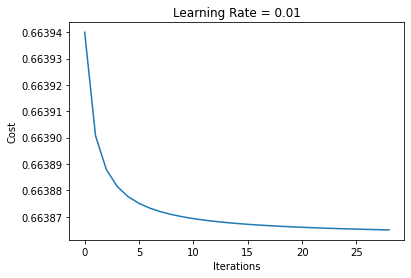

In [24]:
iter = int(input("Enter the number of iterations: "))
lr = float(input("Enter the learning rate: "))

param = initParams(layers)
## param has Weight and Bias for each layer
m = X.shape[1]
cost = []

for i in range(1,iter):

  A_last_layer , caches = forwardProp(X ,param)
  #Cache = [Layer][Linear Cache][Parameter]

  loss = calcCost(A_last_layer ,Y ,m)
  if i%1000==0:
    cost.append(loss)
    print(loss)

  grads = backwardProp(A_last_layer ,Y ,caches)
  ## grads has dW,dB for each layer

  param = learn(param,grads,lr)

plt.plot(cost)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Learning Rate = " +str(lr))
plt.show()

In [29]:
x = int(input("Enter the value of x: "))
y = int(input("Enter the value of y: "))

if (x!=0 and x!=1) or (y!=0 and y!=1):
  print("Invalid")

pred = np.array((x,y))

pred = pred.reshape((pred.shape[0],1))
result = predict(pred,param)

if result>0.5:
  result = 1
else:
  result = 0

print("OR gate output is: "+str(result))

Enter the value of x: 0
Enter the value of y: 1
OR gate output is: 1
